## Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import mean
import torch
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from torch.utils import data as D
import torch
from PIL import Image
import os
import glob
import os.path as osp

## mount

In [ ]:

from google.colab import drive;
drive.mount("/content/gdrive");

Mounted at /content/gdrive


## dataset loading

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/soft-assignment2-dataset/training-a.csv");
print(df.head(5));

     filename           original filename  ...  contributing team  database name
0  a00000.png   Scan_58_digit_5_num_8.png  ...       Buet_Broncos     training-a
1  a00001.png   Scan_73_digit_3_num_5.png  ...       Buet_Broncos     training-a
2  a00002.png   Scan_18_digit_1_num_3.png  ...       Buet_Broncos     training-a
3  a00003.png  Scan_166_digit_7_num_3.png  ...       Buet_Broncos     training-a
4  a00004.png  Scan_108_digit_0_num_1.png  ...       Buet_Broncos     training-a

[5 rows x 7 columns]


## Drop columns except filename and digit

In [ ]:
modified_df = df.drop(df.iloc[:,1:3],axis = 1);
modified_df = modified_df.drop(modified_df.iloc[:,2:],axis = 1);
print(modified_df);
print(len(modified_df));

         filename  digit
0      a00000.png      5
1      a00001.png      3
2      a00002.png      1
3      a00003.png      7
4      a00004.png      0
...           ...    ...
19697  a19697.png      4
19698  a19698.png      3
19699  a19699.png      8
19700  a19700.png      3
19701  a19701.png      8

[19702 rows x 2 columns]
19702


## hyperparams

In [ ]:
batch_size = 20;
num_iters = 20000;
input_dim = 180 * 180; #num_features = 32400
output_dim = 10;
learning_rate = 0.01;
num_nodes_in_hidden_layers = 200;
num_hidden_layers = 6;
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device);

cpu


## dataset path


In [ ]:
path = '/content/gdrive/MyDrive/soft-assignment2-dataset/training-a';

## dataset preprocessing

In [ ]:
class imageDataset(D.Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

## normalize

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(180),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


## return the pre processed dataset

In [ ]:
full_dataset  = imageDataset(modified_df, path, train_transform)


## train test split

In [ ]:
dataset_size = len(full_dataset);
print(dataset_size);
indices = list(range(dataset_size));
train_dataset_len = int(np.floor(0.8 * dataset_size))
print(train_dataset_len);
test_dataset_len = dataset_size - train_dataset_len;
print(test_dataset_len);
train_dataset, test_dataset = D.random_split(full_dataset, lengths=[train_dataset_len, test_dataset_len]);
print(train_dataset);
print(test_dataset);


19702
15761
3941


## dataloader  which combines samples and data providing iterable characteristic

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

print(num_epochs)

25


## tanh ( hyperbolic tangent activation function) non-linear ranges from -1 to 1

In [ ]:
import torch.nn as nn;
class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer
        self.linear_1 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.tanh = nn.Tanh()

        ### 2nd1st hidden layer
        self.linear_2 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.tanh = nn.Tanh()

        ### 3rd hidden layer
        self.linear_3 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.tanh = nn.Tanh()

        ### 4th hidden layer
        self.linear_4 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.tanh = nn.Tanh()

        ### 5th hidden layer
        self.linear_5 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.tanh = nn.Tanh()

        ### 1st hidden layer
        self.linear_6 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.tanh = nn.Tanh()

        ### Output layer
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        # Linear layer
        out  = self.linear_1(x)
        # Non-linearity
        out = self.tanh(out)

        # Linear layer
        out  = self.linear_2(x)
        # Non-linearity
        out = self.tanh(out)

        # Linear layer
        out  = self.linear_3(x)
        # Non-linearity
        out = self.tanh(out)

        # Linear layer
        out  = self.linear_4(x)
        # Non-linearity
        out = self.tanh(out)

        # Linear layer
        out  = self.linear_5(x)
        # Non-linearity
        out = self.tanh(out)

        # Linear layer
        out  = self.linear_6(x)
        # Non-linearity
        out = self.tanh(out)

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

## INSTANTIATE MODEL CLASS

In [ ]:

 
model = NeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_nodes_in_hidden_layers)

## loss optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## train model

In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 180*180).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180*180).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3128609657287598. Accuracy: 11.849784318700838
Iteration: 1000. Loss: 2.2902204990386963. Accuracy: 10.707942146663283
Iteration: 1500. Loss: 2.2350809574127197. Accuracy: 17.609743719868053
Iteration: 2000. Loss: 2.117537021636963. Accuracy: 15.706673433138798
Iteration: 2500. Loss: 2.0438754558563232. Accuracy: 19.030702867292565
Iteration: 3000. Loss: 2.0345029830932617. Accuracy: 17.127632580563308
Iteration: 3500. Loss: 2.025852680206299. Accuracy: 20.578533367165694
Iteration: 4000. Loss: 2.0050086975097656. Accuracy: 17.102258310073584
Iteration: 4500. Loss: 2.1964328289031982. Accuracy: 22.633849276833292
Iteration: 5000. Loss: 2.066392183303833. Accuracy: 21.111393047449887
Iteration: 5500. Loss: 1.8094453811645508. Accuracy: 22.912966252220247
Iteration: 6000. Loss: 1.990645408630371. Accuracy: 23.369703121035272
Iteration: 6500. Loss: 1.8954362869262695. Accuracy: 24.84141080943923
Iteration: 7000. Loss: 1.9519325494766235. Accuracy: 21.6696269982238


## dataloader for Relu

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 
print(len(train_loader));
print(len(test_loader));

789
198


## relu  (rectified linear) activation function

In [ ]:
import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        
        self.relu_1 = nn.ReLU()
 
        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_2 = nn.ReLU()
 
        
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_3 = nn.ReLU()
 
         
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_4 = nn.ReLU()
 
         
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        
        self.relu_5= nn.ReLU()
 
         
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_6 = nn.ReLU()
 
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
 
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
 


 


## INSTANTIATE MODEL CLASS

In [ ]:

 
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_nodes_in_hidden_layers)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=32400, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

## INSTANTIATE LOSS & OPTIMIZER CLASS

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## train model

In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
 
        images = images.view(-1, 180*180).to(device)
        labels = labels.to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180*180).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images)
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3020071983337402. Accuracy: 10.048211113930474
Iteration: 1000. Loss: 2.303243398666382. Accuracy: 9.819842679522964
Iteration: 1500. Loss: 2.300586700439453. Accuracy: 12.027404212128902
Iteration: 2000. Loss: 2.3019824028015137. Accuracy: 15.985790408525755
Iteration: 2500. Loss: 2.296966075897217. Accuracy: 14.082720121796498
Iteration: 3000. Loss: 2.2965612411499023. Accuracy: 15.123065211875158
Iteration: 3500. Loss: 2.2788310050964355. Accuracy: 10.75869068764273
Iteration: 4000. Loss: 2.2598884105682373. Accuracy: 13.549860441512307
Iteration: 4500. Loss: 2.245657444000244. Accuracy: 17.482872367419436
Iteration: 5000. Loss: 2.28306245803833. Accuracy: 14.15884293326567
Iteration: 5500. Loss: 2.086484909057617. Accuracy: 15.097690941385435
Iteration: 6000. Loss: 2.073270082473755. Accuracy: 20.045673686881504
Iteration: 6500. Loss: 1.9287750720977783. Accuracy: 14.869322506977925
Iteration: 7000. Loss: 2.073667049407959. Accuracy: 21.44125856381629
Iterat

## loss values over iterations

In [ ]:
loss_exp_given_batch =[2.30,2.30,2.30,2.30,2.29,2.29,2.27,2.25,2.24,2.28,2.08,2.07,1.92,2.07,2.23,1.99,2.07,2.0,2.07,1.79,1.93,2.27,2.15,1.87,1.92,1.66,2.03,1.64,1.92,
                       1.62,1.84,2.09,1.9,2.09,1.72,1.8,1.36,1.56,1.84];
print(len(loss_exp_given_batch));

39


## modified hyper params try 1

In [ ]:
batch_size = 50;
num_iters = 30000;
input_dim = 180 * 180; #num_features = 32400
output_dim = 10;
learning_rate = 0.01;
num_nodes_in_hidden_layers = 200;
num_hidden_layers = 3;
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device);

cpu


## relu for modified batch

In [ ]:
class imageDataset(D.Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

## normalize

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(180),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


## returns the dataset

In [ ]:
full_dataset  = imageDataset(modified_df, path, train_transform)

## train test split

In [ ]:
dataset_size = len(full_dataset);
print(dataset_size);
indices = list(range(dataset_size));
train_dataset_len = int(np.floor(0.8 * dataset_size))
print(train_dataset_len);
test_dataset_len = dataset_size - train_dataset_len;
print(test_dataset_len);
train_dataset, test_dataset = D.random_split(full_dataset, lengths=[train_dataset_len, test_dataset_len]);
print(len(train_dataset));
print(len(test_dataset));


19702
15761
3941
15761
3941


## dataloader

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

print(len(train_loader));
print(len(test_loader));

316
79


## relu for modified  data

In [ ]:
import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        
        self.relu_1 = nn.ReLU()
 
        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_2 = nn.ReLU()
 
        
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_3 = nn.ReLU()
 
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
 
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
 


 


## INSTANTIATE MODEL CLASS

In [ ]:

 
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_nodes_in_hidden_layers)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=32400, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

## INSTANTIATE LOSS & OPTIMIZER CLASS

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## train model

In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
 
        images = images.view(-1, 180*180).to(device)
        labels = labels.to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180*180).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images)
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.286027669906616. Accuracy: 12.687135244861711
Iteration: 1000. Loss: 2.258591413497925. Accuracy: 16.721644252727735
Iteration: 1500. Loss: 2.0786993503570557. Accuracy: 19.157574219741182
Iteration: 2000. Loss: 2.110687732696533. Accuracy: 14.869322506977925
Iteration: 2500. Loss: 2.1355552673339844. Accuracy: 23.902562801319462
Iteration: 3000. Loss: 2.2062909603118896. Accuracy: 28.393808678000507
Iteration: 3500. Loss: 2.0276875495910645. Accuracy: 27.937071809185486
Iteration: 4000. Loss: 1.9035427570343018. Accuracy: 31.69246384166455
Iteration: 4500. Loss: 2.277811050415039. Accuracy: 19.43669119512814
Iteration: 5000. Loss: 2.033590316772461. Accuracy: 34.153768079167726
Iteration: 5500. Loss: 2.223979949951172. Accuracy: 28.749048464856635
Iteration: 6000. Loss: 1.5838619470596313. Accuracy: 41.740674955595026
Iteration: 6500. Loss: 2.247786045074463. Accuracy: 34.94037046434915
Iteration: 7000. Loss: 1.5758352279663086. Accuracy: 39.786856127886324
Ite

## modified hyperparmas try 2

In [ ]:
batch_size = 90;
num_iters = 30000;
input_dim = 180 * 180; #num_features = 32400
output_dim = 10;
learning_rate = 0.01;
num_nodes_in_hidden_layers = 200;
num_hidden_layers = 3;
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device);

cpu


## relu for modified

In [ ]:
class imageDataset(D.Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

## normalize

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(180),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


## return from dataset

In [ ]:
full_dataset  = imageDataset(modified_df, path, train_transform)

## train test split

In [ ]:
dataset_size = len(full_dataset);
print(dataset_size);
indices = list(range(dataset_size));
train_dataset_len = int(np.floor(0.7 * dataset_size))
print(train_dataset_len);
test_dataset_len = dataset_size - train_dataset_len;
print(test_dataset_len);
train_dataset, test_dataset = D.random_split(full_dataset, lengths=[train_dataset_len, test_dataset_len]);
print(len(train_dataset));
print(len(test_dataset));


19702
13791
5911
13791
5911


## dataloader

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

print(len(train_loader));
print(len(test_loader));

154
66


## train model

In [ ]:
import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        
        self.relu_1 = nn.ReLU()
 
        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_2 = nn.ReLU()
 
        
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_3 = nn.ReLU()
 
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
 
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
 


 


## INSTANTIATE MODEL CLASS

In [ ]:

 
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_nodes_in_hidden_layers)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=32400, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

## INSTANTIATE LOSS & OPTIMIZER CLASS

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## train model

In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
 
        images = images.view(-1, 180*180).to(device)
        labels = labels.to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180*180).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images)
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2726361751556396. Accuracy: 14.616816105565894
Iteration: 1000. Loss: 2.2565910816192627. Accuracy: 14.989003552698358
Iteration: 1500. Loss: 2.080373764038086. Accuracy: 30.265606496362714
Iteration: 2000. Loss: 2.158987522125244. Accuracy: 16.934528844527154
Iteration: 2500. Loss: 2.057471990585327. Accuracy: 20.74099137201827
Iteration: 3000. Loss: 2.042534351348877. Accuracy: 26.679072914904417
Iteration: 3500. Loss: 1.8108712434768677. Accuracy: 34.9856200304517
Iteration: 4000. Loss: 1.979836344718933. Accuracy: 32.109626120791745
Iteration: 4500. Loss: 1.6205188035964966. Accuracy: 38.690576890543056
Iteration: 5000. Loss: 1.6592520475387573. Accuracy: 37.65860260531213
Iteration: 5500. Loss: 1.5279568433761597. Accuracy: 39.21502283877516
Iteration: 6000. Loss: 1.5456855297088623. Accuracy: 39.993232955506684
Iteration: 6500. Loss: 1.9726393222808838. Accuracy: 31.974285230925393
Iteration: 7000. Loss: 1.990026831626892. Accuracy: 30.722381999661646
Iter

## loss values dataset

In [ ]:
loss_exp2 = [2.2726361751556396,2.2565910816192627,2.080373764038086,2.158987522125244,2.057471990585327,2.042534351348877,1.8108712434768677,
             1.979836344718933,1.6205188035964966,1.6592520475387573,1.5279568433761597,1.5456855297088623,1.9726393222808838,1.990026831626892,
             1.5992575883865356,1.4705723524093628,1.6135367155075073,1.3276653289794922,1.5077587366104126,1.4264134168624878,1.3222309350967407,1.289932131767273,
             1.2106045484542847,1.3057507276535034,1.3678022623062134,0.9775875806808472,1.1362582445144653,1.369154930114746,1.1540265083312988,
             1.3089178800582886,1.020758867263794,0.8816646337509155,1.0983954668045044,0.9836174249649048,1.0079796314239502,1.0318185091018677,
             0.9590660333633423,1.2621111869812012,0.9982520937919617,0.8423469662666321,1.0179048776626587,0.9024830460548401,0.6723088026046753,
             1.1111783981323242,0.7154403924942017,0.5826041102409363,1.0740443468093872,0.8914462327957153,0.8026340007781982,0.7459202408790588,
             0.6690678000450134,0.7377473711967468,0.900242269039154,0.6513432264328003,0.7711045742034912,0.7244469523429871,0.6419389247894287,
             0.6290908455848694,0.7627173662185669,0.6233039498329163];
print(len(loss_exp2));

60


## iteration list

In [ ]:
iterations = list(range(500,30500,500));
print(len(iterations));

60


## loss vs iterations

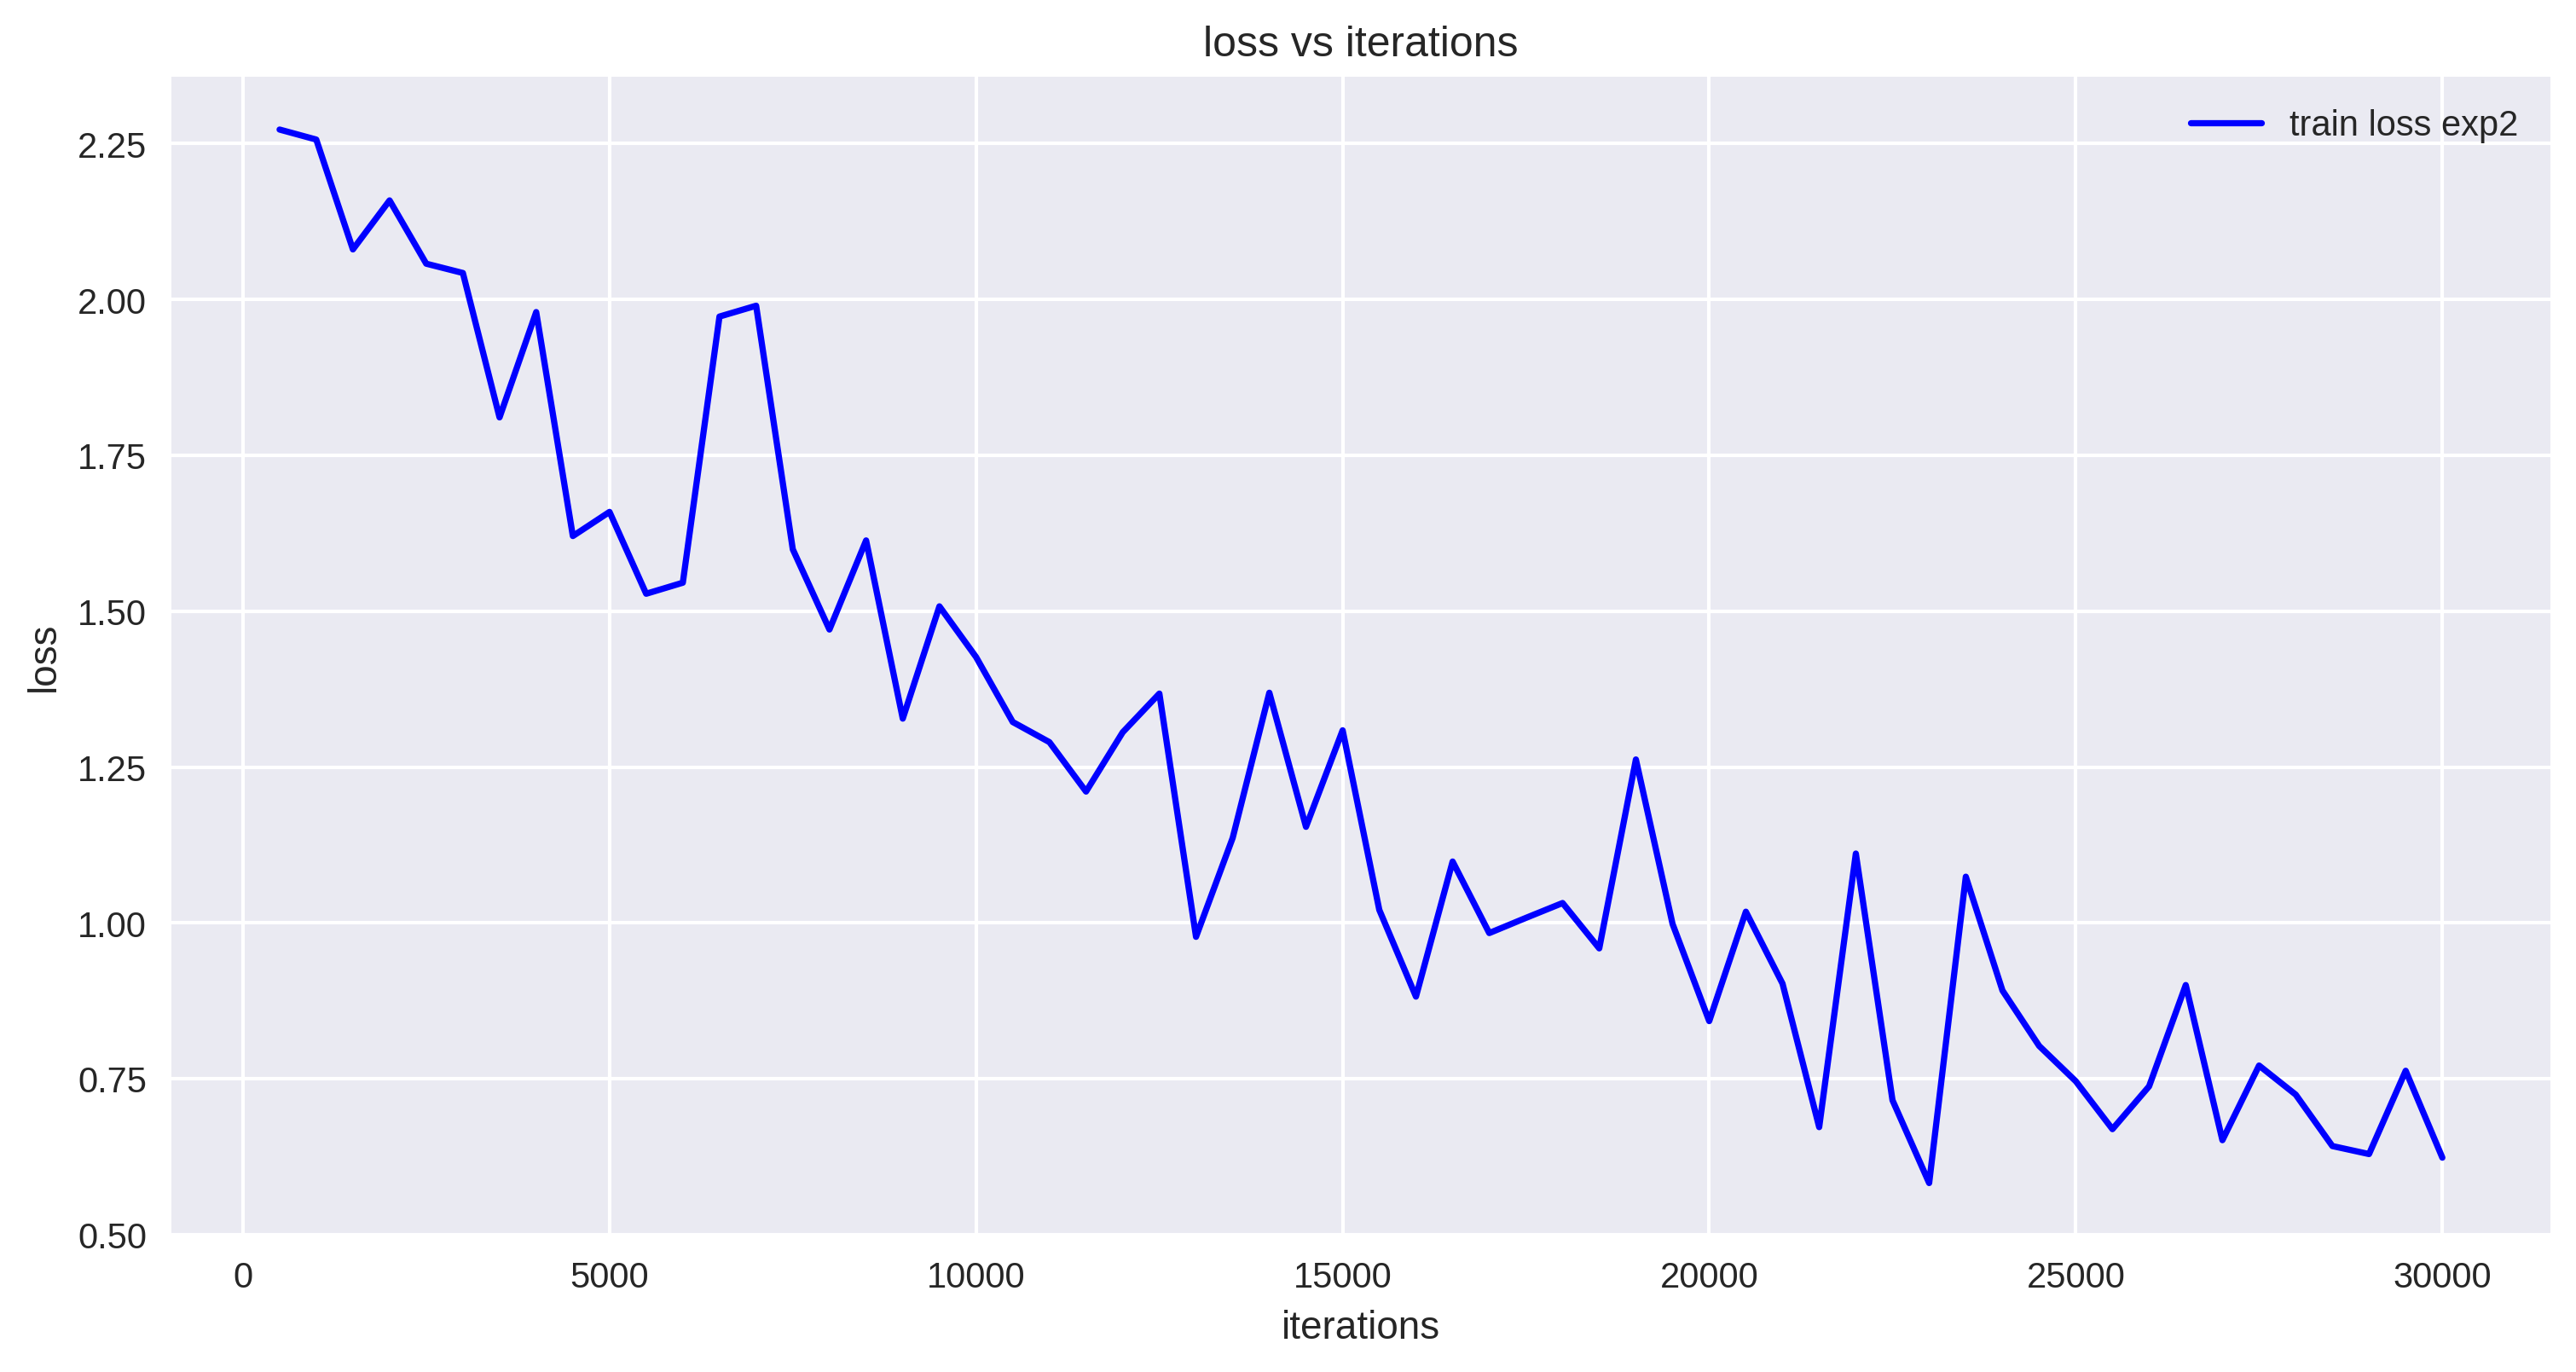

In [ ]:
plt.figure(figsize=(12,6),dpi=300);
plt.style.use('seaborn');
plt.plot(iterations , loss_exp2, color='blue',label='train loss exp2');
plt.title('loss vs iterations');
plt.xlabel('iterations');
plt.ylabel('loss');
plt.grid(True); #create a grid layout
plt.legend();
plt.show()

## modified hyperparams try 3

In [ ]:
batch_size = 256;
num_iters = 30500;
input_dim = 180 * 180; #num_features = 32400
output_dim = 10;
learning_rate = 0.01;
num_nodes_in_hidden_layers = 200;
num_hidden_layers = 3;
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device);

cpu


## relu for modified data

In [ ]:
class imageDataset(D.Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

## normalize

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(180),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


## return from dataset

In [ ]:
full_dataset  = imageDataset(modified_df, path, train_transform)

## train test split

In [ ]:
dataset_size = len(full_dataset);
print(dataset_size);
indices = list(range(dataset_size));
train_dataset_len = int(np.floor(0.7 * dataset_size))
print(train_dataset_len);
test_dataset_len = dataset_size - train_dataset_len;
print(test_dataset_len);
train_dataset, test_dataset = D.random_split(full_dataset, lengths=[train_dataset_len, test_dataset_len]);
print(len(train_dataset));
print(len(test_dataset));


19702
13791
5911
13791
5911


## dataloader

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

print(len(train_loader));
print(len(test_loader));

54
24


## relu for modified data

In [ ]:
import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        
        self.relu_1 = nn.ReLU()
 
        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_3 = nn.ReLU()
 
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_3(out)
 

        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
 


 


## INSTANTIATE MODEL CLASS

In [ ]:

 
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_nodes_in_hidden_layers)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=32400, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

## INSTANTIATE LOSS & OPTIMIZER CLASS

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## train model

In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 180*180).to(device)
        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180*180).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images)
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.265347957611084. Accuracy: 15.750296058196582
Iteration: 1000. Loss: 2.164276599884033. Accuracy: 21.56995432244967
Iteration: 1500. Loss: 2.100003242492676. Accuracy: 17.57739807139232
Iteration: 2000. Loss: 1.9486007690429688. Accuracy: 24.32752495347657
Iteration: 2500. Loss: 1.9287478923797607. Accuracy: 22.872610387413296
Iteration: 3000. Loss: 1.787732720375061. Accuracy: 33.71679918795466
Iteration: 3500. Loss: 1.7890719175338745. Accuracy: 33.040094738622905
Iteration: 4000. Loss: 2.1407928466796875. Accuracy: 30.181018440196244
Iteration: 4500. Loss: 1.8562374114990234. Accuracy: 38.47064794451023
Iteration: 5000. Loss: 1.905951738357544. Accuracy: 36.542040263914735
Iteration: 5500. Loss: 1.6241337060928345. Accuracy: 41.109795296904075
Iteration: 6000. Loss: 1.406710147857666. Accuracy: 47.48773473185586
Iteration: 6500. Loss: 1.545538306236267. Accuracy: 44.747081712062254
Iteration: 7000. Loss: 1.4389755725860596. Accuracy: 46.455760446624936
Iterat

## loss iterations

In [ ]:
loss_exp2_1 =[2.26,2.16,2.10,1.94,1.92,1.78,1.79,2.14,1.85,1.90,1.62,1.40,1.54,1.43,1.29,1.32,1.20,1.44,1.05,1.27,1.06,1.07,1.13,0.99,1.01,1.09,1.11,0.95,
              1.25,1.06,0.98,1.09,0.93,0.90,0.77,0.81,0.78,0.91,0.69,0.66,0.65,0.65,0.67,0.6,0.63,0.64,0.88,0.92,0.6,0.59,0.57,0.63,0.78,0.54,0.71,0.51,
              0.58,0.82,0.49,0.5];

## loss vs iterations

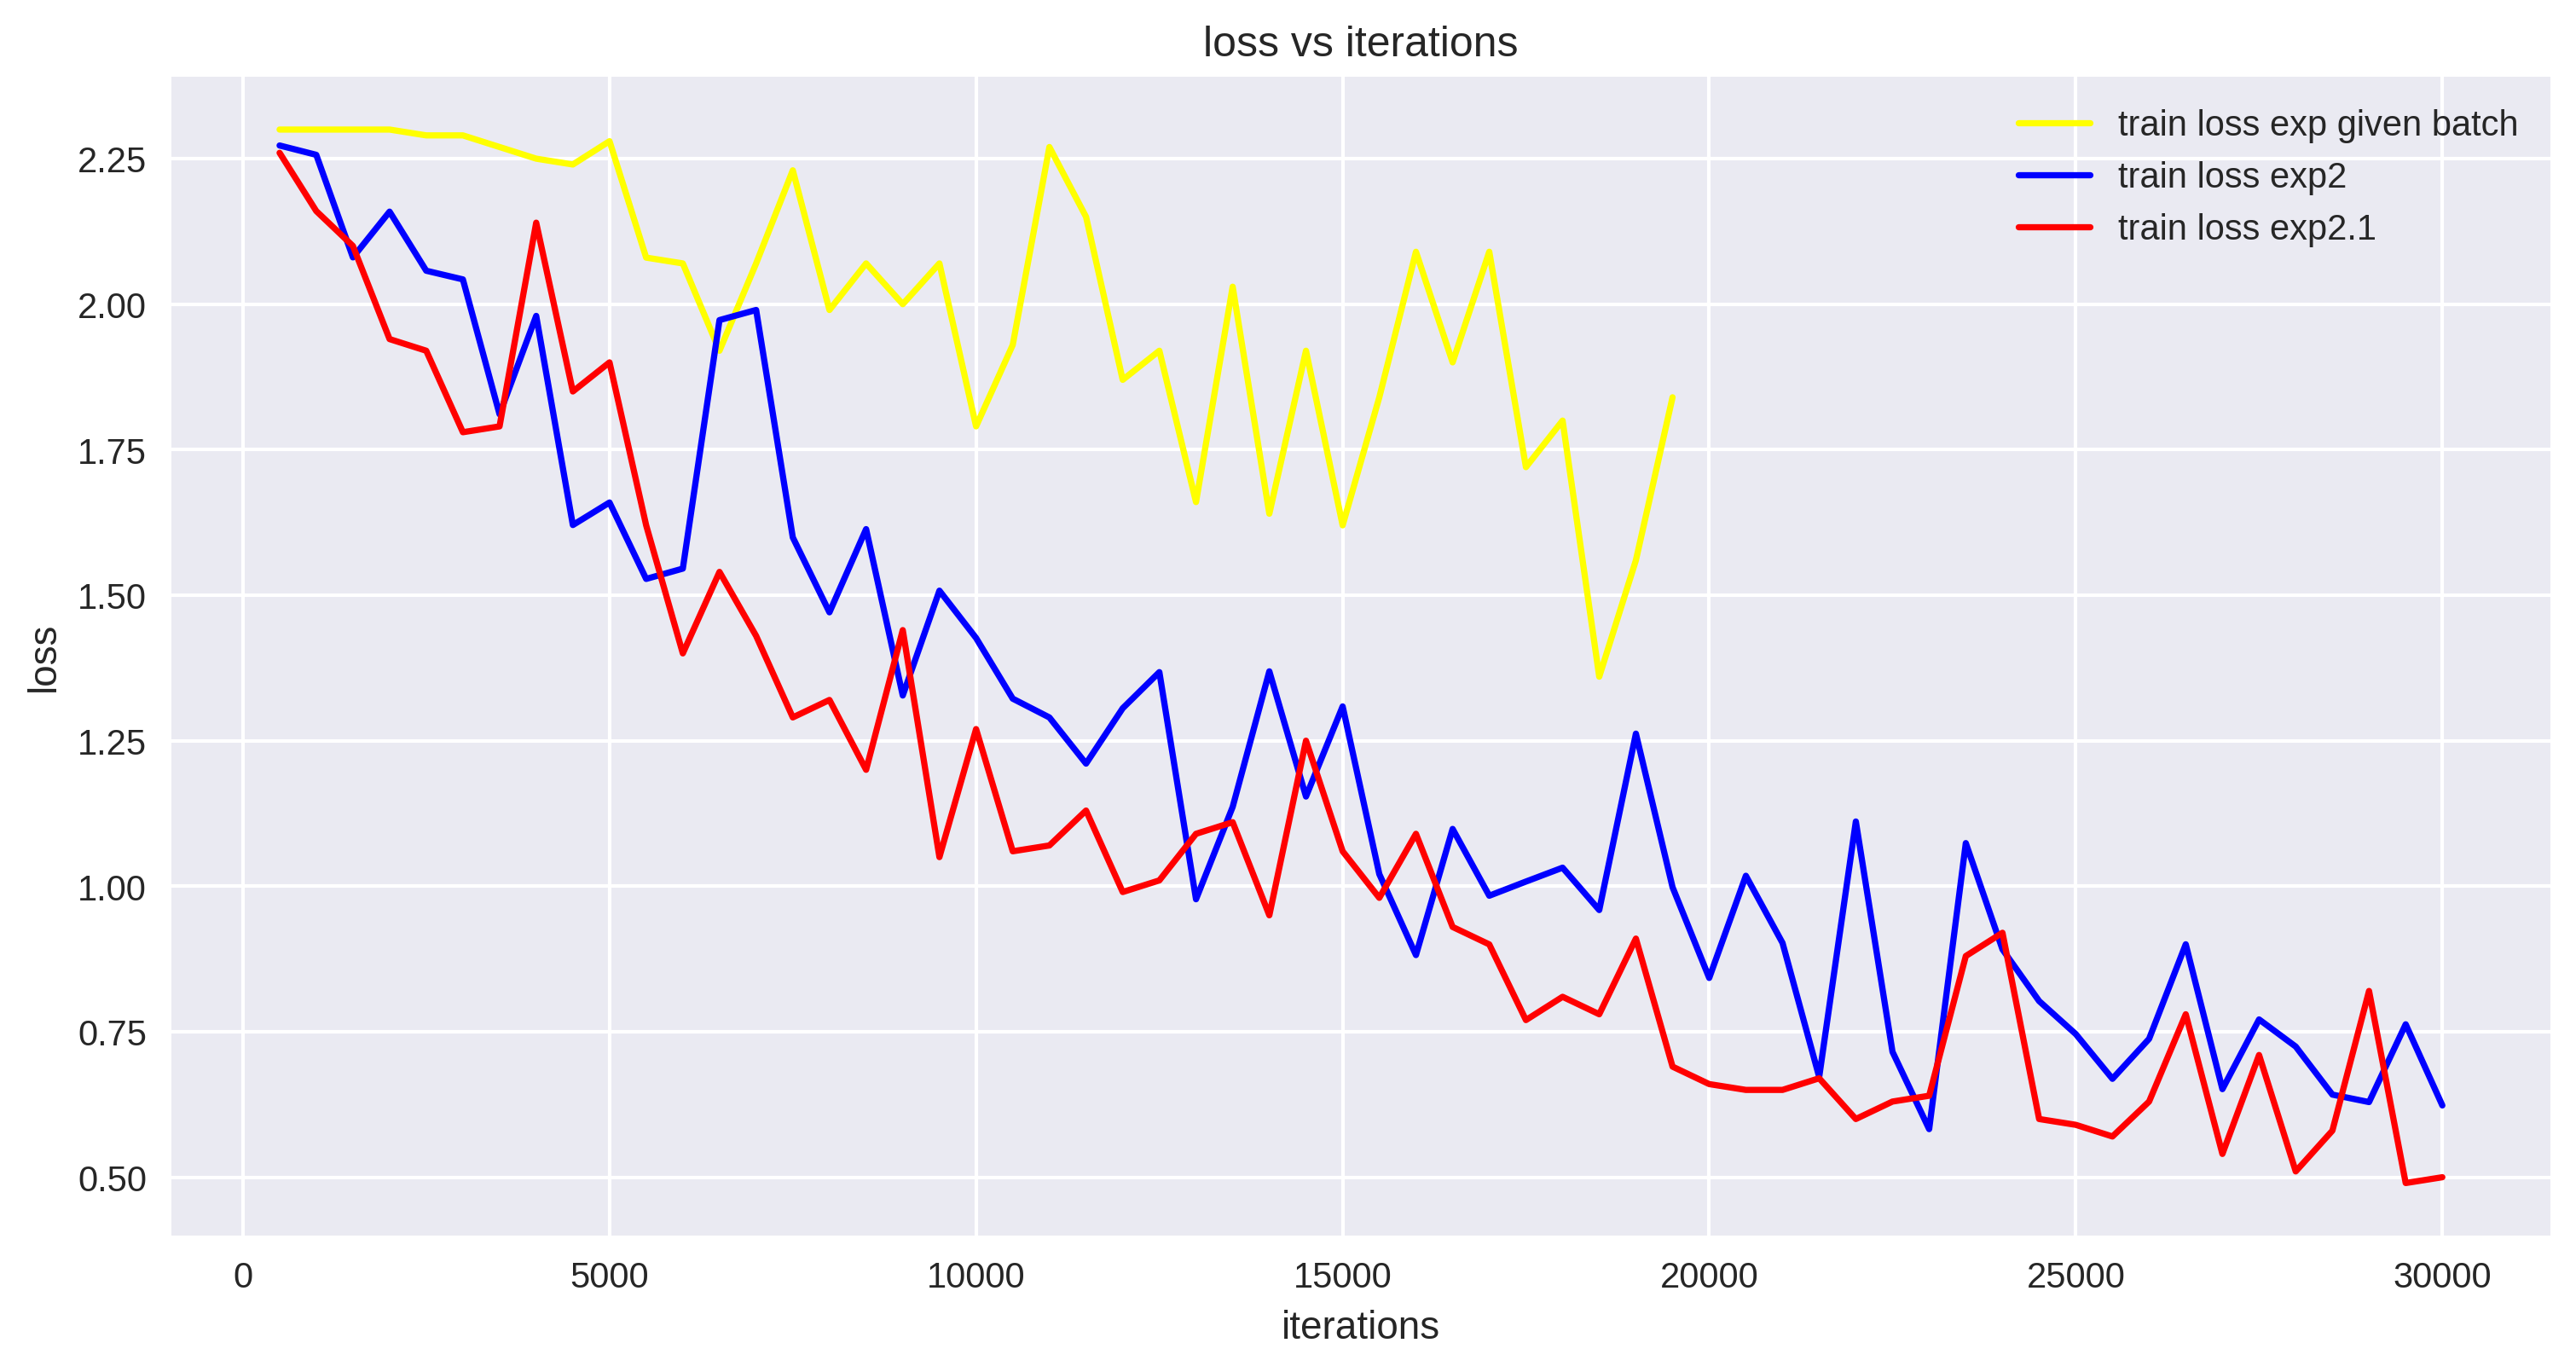

In [ ]:
plt.figure(figsize=(12,6),dpi=300);
plt.style.use('seaborn');
plt.plot(iterations[0:39] , loss_exp_given_batch, color='yellow',label='train loss exp given batch');
plt.plot(iterations , loss_exp2, color='blue',label='train loss exp2');
plt.plot(iterations , loss_exp2_1, color='red',label='train loss exp2.1');
plt.title('loss vs iterations');
plt.xlabel('iterations');
plt.ylabel('loss');
plt.grid(True); #create a grid layout
plt.legend();
plt.show()

## Dataset 2

In [ ]:
train_df = pd.read_csv("/content/gdrive/MyDrive/soft-assignment2-dataset/verification_train.csv");
print(train_df.head(5));

   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      2       0       0       0  ...         0         0         0         0
1      9       0       0       0  ...         0         0         0         0
2      6       0       0       0  ...         0         0         0         0
3      0       0       0       0  ...         0         0         0         0
4      3       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


In [ ]:
test_df = pd.read_csv("/content/gdrive/MyDrive/soft-assignment2-dataset/verification_test.csv");
print(test_df.head(5));

   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      0       0       0       0  ...         0         0         0         0
1      1       0       0       0  ...         0         0         0         0
2      2       0       0       0  ...        31         0         0         0
3      2       0       0       0  ...       222        56         0         0
4      3       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math;
from matplotlib.pyplot import imshow

4
784
28
Label: 4


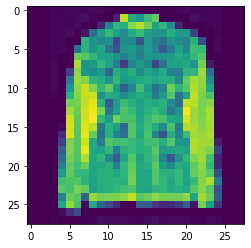

In [ ]:
i = 5 # set any valid index of an image
label = train_df.values[i][0] # retrieve label from first colum in dataframe
print(label)
im_buf = train_df.values[i][1:] # create flat array of only the pixels of the given image
print(len(im_buf)); 
axis_len = int(math.sqrt(im_buf.shape[0])) # calculate the dimensions of the square image
print(axis_len);
im_array = np.int8(np.reshape(im_buf, (axis_len, axis_len))) # create a 2D array from flat array
img = Image.fromarray(im_array, 'L') # convert to a PIL.Image object ('L' is for grayscale)

print(f'Label: {label}')
imshow(np.asarray(img))


In [ ]:
train_df['pixel12'] = train_df['pixel12'] / 255;
for i in train_df['pixel12']:
  print(i);


Streaming output truncated to the last 5000 lines.
0.8
0.19215686274509805
0.0
0.2196078431372549
0.0
0.48627450980392156
0.0
0.00392156862745098
0.0
0.0
0.0
0.0
0.0
0.011764705882352941
0.23921568627450981
0.8901960784313725
0.0
0.01568627450980392
0.1607843137254902
0.0
0.0
0.403921568627451
0.5137254901960784
0.34901960784313724
0.0
0.0
0.0
0.0
0.0
0.8117647058823529
0.0
0.0
0.0
0.8431372549019608
0.43529411764705883
0.5725490196078431
0.0
0.0
0.0
0.0
0.5490196078431373
0.15294117647058825
0.0
0.0
0.7725490196078432
0.00784313725490196
0.27450980392156865
0.058823529411764705
0.0
0.9058823529411765
0.0
0.0
0.6352941176470588
0.0
0.7490196078431373
0.5098039215686274
0.0
0.3058823529411765
0.0
0.09019607843137255
0.6627450980392157
0.0
0.41568627450980394
0.0
0.0
0.40784313725490196
0.0
0.0
0.0
0.0
0.9725490196078431
0.0
0.0
0.0
0.0
0.40784313725490196
0.5372549019607843
0.0
0.0
0.0
0.0
0.27058823529411763
0.39215686274509803
0.00392156862745098
0.0
0.40784313725490196
0.0
0.0
0.1960

## data label from dataset 2

In [ ]:
test_label=test_df['label']

train_label=train_df['label']
data_names=[test_label,train_label]
all_labels=pd.concat(data_names,ignore_index=True)
print(all_labels);

0        0
1        1
2        2
3        2
4        3
        ..
69995    9
69996    1
69997    8
69998    8
69999    7
Name: label, Length: 70000, dtype: int64


## image pixels for dataset 2

In [ ]:
data_name=[test_df,train_df]
all_image=pd.concat(data_name,ignore_index=True)
all_image=all_image.drop(labels='label',axis=1)
print(all_image.shape)
print(all_image);

(70000, 784)
       pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...        31         0         0         0
3           0       0       0       0  ...       222        56         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
69995       0       0       0       0  ...         0         0         0         0
69996       0       0       0       0  ...         0         0         0         0
69997       0       0       0       0  ...         0         0         0         0
69998       0       0       0       0  ...         0         0         0         0
69999       0       0       0       0  ...         0         0         0  

## normalize

In [ ]:
all_image=all_image/255.0

## reshape image

In [ ]:
all_image=all_image.values.reshape(-1,28,28,1)

##  print images

0


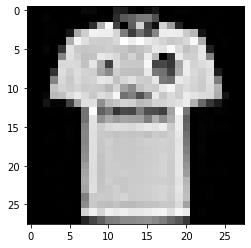

In [ ]:
show_img = all_image[0].reshape(28, 28)
plt.imshow(show_img, cmap='gray')
print(all_labels[0])

## train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_image, all_labels, test_size=0.2)

## zipped

In [ ]:
train_dataset_zipped = list(zip(X_train,y_train))
test_dataset_zipped = list(zip(X_test,y_test))
print(len(train_dataset_zipped))
print(len(test_dataset_zipped))


56000
14000


## hyperparams

In [ ]:
batch_size = 20;
num_iters = 20000;
input_dim = 28*28; #num_features = 784
output_dim = 10;
learning_rate = 0.01;
num_nodes_in_hidden_layers = 200;
num_hidden_layers = 6;
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device);

cpu


## dataloader

In [ ]:
num_epochs = num_iters / (len(train_dataset_zipped) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset_zipped, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset_zipped, 
                                          batch_size=batch_size, 
                                          shuffle=False) 
print(len(train_loader));
print(len(test_loader));

2800
700


## relu for dataset 2

In [ ]:
import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        
        self.relu_1 = nn.ReLU()
 
        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_2 = nn.ReLU()
 
        
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_3 = nn.ReLU()
 
         
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_4 = nn.ReLU()
 
         
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        
        self.relu_5= nn.ReLU()
 
         
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_6 = nn.ReLU()
 
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
 
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

## INSTANTIATE MODEL CLASS

In [ ]:

 
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_nodes_in_hidden_layers)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

## INSTANTIATE LOSS & OPTIMIZER CLASS

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## train model

In [ ]:
Iteration_loss =[]
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
 
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images.float()) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images.float())
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            Iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2994258403778076. Accuracy: 9.957142857142857
Iteration: 1000. Loss: 2.3014297485351562. Accuracy: 9.685714285714285
Iteration: 1500. Loss: 2.3001925945281982. Accuracy: 9.685714285714285
Iteration: 2000. Loss: 2.2985172271728516. Accuracy: 36.24285714285714
Iteration: 2500. Loss: 2.301028251647949. Accuracy: 23.65
Iteration: 3000. Loss: 2.2636313438415527. Accuracy: 19.12857142857143
Iteration: 3500. Loss: 1.7909473180770874. Accuracy: 31.8
Iteration: 4000. Loss: 1.2197067737579346. Accuracy: 50.25714285714286
Iteration: 4500. Loss: 0.9825542569160461. Accuracy: 55.97142857142857
Iteration: 5000. Loss: 1.3870904445648193. Accuracy: 58.97857142857143
Iteration: 5500. Loss: 0.9838212132453918. Accuracy: 65.42142857142858
Iteration: 6000. Loss: 0.8026484251022339. Accuracy: 65.61428571428571
Iteration: 6500. Loss: 0.6692919731140137. Accuracy: 70.66428571428571
Iteration: 7000. Loss: 0.9927588701248169. Accuracy: 71.31428571428572
Iteration: 7500. Loss: 0.71053975

## modified hyper parmas for dataset 2 

In [ ]:
batch_size = 256;
num_iters = 30000;
input_dim = 28*28; #num_features = 784
output_dim = 10;
learning_rate = 0.01;
num_nodes_in_hidden_layers = 200;
num_hidden_layers = 3;
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device);

cpu


## dataloader

In [ ]:
num_epochs = num_iters / (len(train_dataset_zipped) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset_zipped, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset_zipped, 
                                          batch_size=batch_size, 
                                          shuffle=False) 
print(len(train_loader));
print(len(test_loader));

219
55


## relu for modified data

In [ ]:
import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        
        self.relu_1 = nn.ReLU()
 
        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_2 = nn.ReLU()
 
        
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_3 = nn.ReLU()
 
         
 
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
 
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

## INSTANTIATE MODEL CLASS

In [ ]:

 
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_nodes_in_hidden_layers)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

## INSTANTIATE LOSS & OPTIMIZER CLASS

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## train model updated hyperparams

In [ ]:
Iteration_loss1 =[]
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
 
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images.float()) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images.float())
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            Iteration_loss1.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.662992238998413. Accuracy: 42.19285714285714
Iteration: 1000. Loss: 0.8798632025718689. Accuracy: 65.72857142857143
Iteration: 1500. Loss: 0.7626171112060547. Accuracy: 71.55
Iteration: 2000. Loss: 0.6763232946395874. Accuracy: 75.08571428571429
Iteration: 2500. Loss: 0.612555742263794. Accuracy: 77.92857142857143
Iteration: 3000. Loss: 0.47853884100914. Accuracy: 79.30714285714286
Iteration: 3500. Loss: 0.6741198301315308. Accuracy: 80.76428571428572
Iteration: 4000. Loss: 0.5390916466712952. Accuracy: 81.60714285714286
Iteration: 4500. Loss: 0.46851038932800293. Accuracy: 82.02142857142857
Iteration: 5000. Loss: 0.4934626519680023. Accuracy: 82.79285714285714
Iteration: 5500. Loss: 0.4979604184627533. Accuracy: 83.15714285714286
Iteration: 6000. Loss: 0.5403412580490112. Accuracy: 83.53571428571429
Iteration: 6500. Loss: 0.42372241616249084. Accuracy: 83.16428571428571
Iteration: 7000. Loss: 0.4805198311805725. Accuracy: 84.06428571428572
Iteration: 7500. Loss

## loss vs iterations

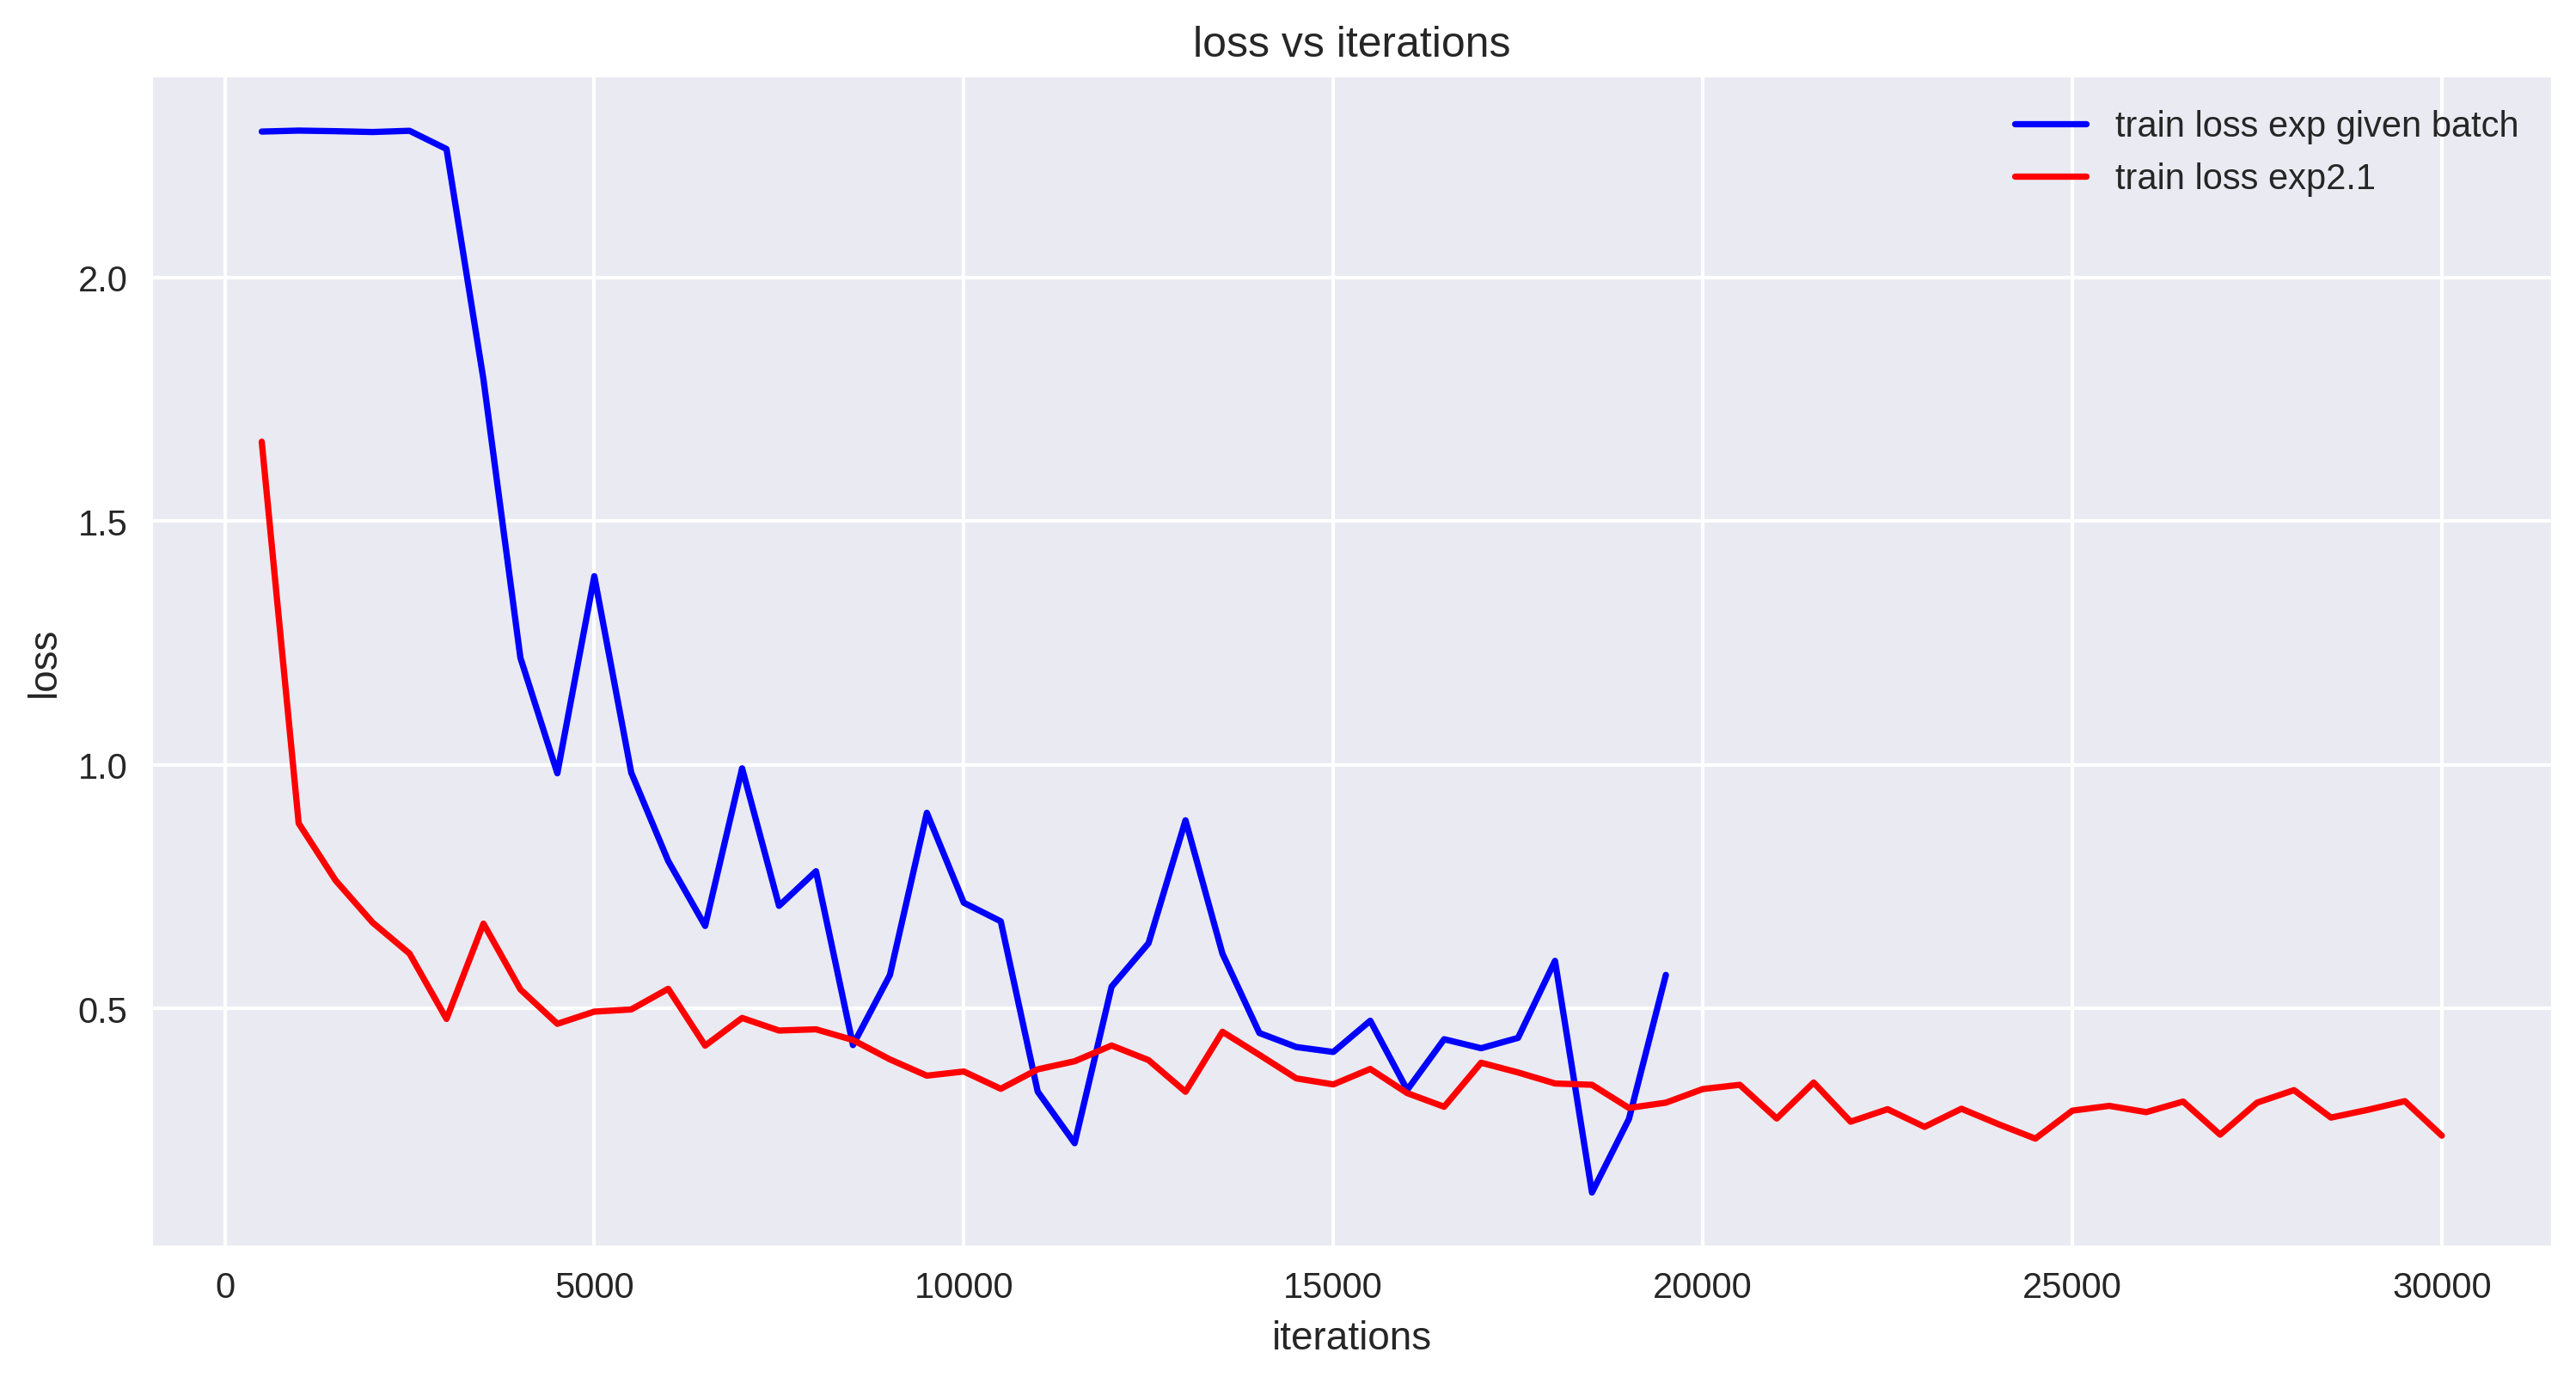

In [ ]:
plt.figure(figsize=(12,6),dpi=300);
plt.style.use('seaborn');
plt.plot(iterations[0:39] , Iteration_loss, color='blue',label='train loss exp given batch');
plt.plot(iterations , Iteration_loss1, color='red',label='train loss exp2.1');
plt.title('loss vs iterations');
plt.xlabel('iterations');
plt.ylabel('loss');
plt.grid(True); #create a grid layout
plt.legend();
plt.show()

## The end of colab



In [ ]:
print("Doumo Arigatou. Sayounara");

Doumo Arigatou. Sayounara
